In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [119]:
url = "https://www.amazon.in/Redmi-Horizon-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QSBF2T7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

#https://httpbin.org/get
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36", 
             "X-Amzn-Trace-Id": "Root=1-63cf0052-760b19697375364569cfc0d0"}

In [3]:
def get_soup(url):

    r = requests.get(url, headers=headers,params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Reviews': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            #'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            #'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            #'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [10]:
for x in tqdm_notebook(range(1,500)):
    
    soup = get_soup(f'https://www.amazon.in/Redmi-Horizon-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QSBF2T7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews={x}')
    get_reviews(soup)
    
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-10-8ab3e8ec18da>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,500)):


  0%|          | 0/499 [00:00<?, ?it/s]

In [11]:
raw_data = pd.DataFrame(reviewlist)
raw_data.head(5)

,Reviews
0,Update 1: 1. Activate game turbo to improve ga...
1,The first look of this starbust design is eye ...
2,Good phone for average users. (4/64 GB)Battery...
3,50 days usage...1. Good battery LIFE. Bqest fo...
4,Quite a smooth daily driver phone. The overall...


In [12]:
print(len(reviewlist))

5580


In [ ]:
#raw_data.to_csv("D:\DS Files\Data\amazon_reviews_redmi.csv")

In [13]:
text_total = " ".join(raw_data["Reviews"])
text_total[:1000]

"Update 1: 1. Activate game turbo to improve gaming preformance. Settings- Special features - Gaming turbo. 2. RAM management: Keep apps in RAM/ recent apps forever. Settings - Battery - click gear symbol at top right - clear cache when device is locked - never. Default value is 10 min. 3. Dual apps: Settings - apps - dual apps - create.I was looking for a phone below 10K. I am not a person who believes to burn money for phones. My requirement was a phone that has good network reception, good wifi reception, a balanced software, good battery life, good screen that don't strain eyes, a good hardware, 3.5 mm headphone jack, and a charger. i don't need 5G network because 5G drains battery a lot and 5G spends too much data. I don't watch movie or YT on mobile network and I wonder how many does watch FHD, 2K, 4K videos over mobile network. For downloading documents, social networks, banking apps 4G is more than enough.In my budget I found all phones have 4gb RAM. Realme Narzo 50 was 9999/- 

In [14]:
chars = sorted(list(set(text_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 !"$%&'()*+,-./0123456789:?ABCDEFGHIKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvwxyz’😤
79


In [15]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  5580 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [16]:
raw_data.isnull().sum()

Reviews    0
dtype: int64

In [51]:
data = raw_data.copy()

In [121]:
import re #regular expression
import string

def cleaning_text(text):

      text = text.lower()
      text = re.sub('😤', "", text)
      # text = re.sub('U+0001F923', "", text)
      # text = re.sub('U+0001F3B6', "", text)
      # text = re.sub('U+1F624', "", text)
      # text = re.sub('@[\w]*', " ", text)
      # text = re.sub('\n',  " ", text)
      # text = re.sub("ß", "b", text)
      # text = re.sub("ð", "o", text)
      # text = re.sub("é", "e", text)
      # text = re.sub('', "", text)
      # text = re.sub('', "", text)
      # text = re.sub('\w*\d\w*', '', text)
      # text = re.sub("[0-9" "]+"," ",text)
      text = re.sub('\[.*?\]', '', text)
      text = re.sub('https?://\S+|www\.\S+', '', text)
      text = re.sub('<.*?>+', '', text)
      text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
      text = re.sub('[‘’“”…]', '', text)
 
      return text

cleaning = lambda x: cleaning_text(x)

In [54]:
data['Cleaned_Reviews'] = data.Reviews.apply(cleaning)
data.head(20)

,Reviews,Cleaned_Reviews
0,Update 1: 1. Activate game turbo to improve ga...,update 1 1 activate game turbo to improve gami...
1,The first look of this starbust design is eye ...,the first look of this starbust design is eye ...
2,Good phone for average users. (4/64 GB)Battery...,good phone for average users 464 gbbattery bac...
3,50 days usage...1. Good battery LIFE. Bqest fo...,50 days usage1 good battery life bqest for day...
4,Quite a smooth daily driver phone. The overall...,quite a smooth daily driver phone the overall ...
5,Don’t buy this phone its a wrong choice its no...,dont buy this phone its a wrong choice its not...
6,It does what the description says.Camera quali...,it does what the description sayscamera qualit...
7,i was looking for a budget phone with fast cha...,i was looking for a budget phone with fast cha...
8,At this price it is value for moneycamara is o...,at this price it is value for moneycamara is o...
9,Very Impressive mobile.. I like it,very impressive mobile i like it


In [55]:
clean_total = " ".join(data["Cleaned_Reviews"])
chars = sorted(list(set(clean_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 0123456789abcdefghijklmnopqrstuvwxyz
37


In [56]:
data = data[data['Cleaned_Reviews']!='']
data.head(10)

,Reviews,Cleaned_Reviews
0,Update 1: 1. Activate game turbo to improve ga...,update 1 1 activate game turbo to improve gami...
1,The first look of this starbust design is eye ...,the first look of this starbust design is eye ...
2,Good phone for average users. (4/64 GB)Battery...,good phone for average users 464 gbbattery bac...
3,50 days usage...1. Good battery LIFE. Bqest fo...,50 days usage1 good battery life bqest for day...
4,Quite a smooth daily driver phone. The overall...,quite a smooth daily driver phone the overall ...
5,Don’t buy this phone its a wrong choice its no...,dont buy this phone its a wrong choice its not...
6,It does what the description says.Camera quali...,it does what the description sayscamera qualit...
7,i was looking for a budget phone with fast cha...,i was looking for a budget phone with fast cha...
8,At this price it is value for moneycamara is o...,at this price it is value for moneycamara is o...
9,Very Impressive mobile.. I like it,very impressive mobile i like it


In [57]:
from textblob import TextBlob
data['Cleaned_Reviews'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    update 1 1 activate game turn to improve gazin...
1    the first look of this starbust design is eye ...
2    good phone for average users 464 battery back ...
3    50 days usage good battery life best for daddy...
4    quite a smooth daily driver phone the overall ...
Name: Cleaned_Reviews, dtype: object

In [58]:
data.shape

(5580, 2)

In [59]:
data.drop_duplicates(subset=['Cleaned_Reviews'], keep=False)
data.shape

(5580, 2)

In [60]:
#Word frequency
freq = pd.Series(' '.join(data['Cleaned_Reviews']).split()).value_counts()[:20] # for top 20
freq

is        35712
and       30132
the       27900
i         23994
for       17856
a         16182
phone     15624
good      15624
this      13392
to        11718
with      10602
you       10044
but        9486
it         9486
has        9486
dont       8928
camera     8928
not        7812
can        7812
ram        7812
dtype: int64

In [61]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [62]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Cleaned_Reviews'] = data['Cleaned_Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data

,Reviews,Cleaned_Reviews
0,Update 1: 1. Activate game turbo to improve ga...,update 1 1 activate game turbo improve gaming ...
1,The first look of this starbust design is eye ...,first look starbust design eye catchyno word e...
2,Good phone for average users. (4/64 GB)Battery...,good phone average users 464 gbbattery backup ...
3,50 days usage...1. Good battery LIFE. Bqest fo...,50 days usage1 good battery life bqest dayday ...
4,Quite a smooth daily driver phone. The overall...,quite smooth daily driver phone overall experi...
...,...,...
5575,Don’t buy this phone its a wrong choice its no...,dont buy phone wrong choice working 5months ic...
5576,It does what the description says.Camera quali...,description sayscamera quality upto mark compa...
5577,i was looking for a budget phone with fast cha...,looking budget phone fast charging capability ...
5578,At this price it is value for moneycamara is o...,price value moneycamara ok impressivelooks als...


In [63]:
TextBlob(data['Cleaned_Reviews'][3]).ngrams(1)

[WordList(['50']),
 WordList(['days']),
 WordList(['usage1']),
 WordList(['good']),
 WordList(['battery']),
 WordList(['life']),
 WordList(['bqest']),
 WordList(['dayday']),
 WordList(['use']),
 WordList(['33w']),
 WordList(['charger']),
 WordList(['also']),
 WordList(['good2']),
 WordList(['best']),
 WordList(['display']),
 WordList(['shouldve']),
 WordList(['120hz']),
 WordList(['instead']),
 WordList(['903']),
 WordList(['sturdy']),
 WordList(['inhand']),
 WordList(['feel4']),
 WordList(['stereo']),
 WordList(['speaker']),
 WordList(['loud']),
 WordList(['crisp6535']),
 WordList(['split5']),
 WordList(['camera']),
 WordList(['average']),
 WordList(['good']),
 WordList(['concerning']),
 WordList(['price6']),
 WordList(['buggy']),
 WordList(['uiminor']),
 WordList(['expected']),
 WordList(['ui13']),
 WordList(['way']),
 WordList(['better']),
 WordList(['bloody']),
 WordList(['miui']),
 WordList(['1257']),
 WordList(['4g']),
 WordList(['chipset']),
 WordList(['sd']),
 WordList(['680'])

In [64]:
TextBlob(data['Cleaned_Reviews'][4]).ngrams(5)

[WordList(['quite', 'smooth', 'daily', 'driver', 'phone']),
 WordList(['smooth', 'daily', 'driver', 'phone', 'overall']),
 WordList(['daily', 'driver', 'phone', 'overall', 'experience']),
 WordList(['driver', 'phone', 'overall', 'experience', 'satisfactory']),
 WordList(['phone', 'overall', 'experience', 'satisfactory', 'cameras']),
 WordList(['overall', 'experience', 'satisfactory', 'cameras', 'good']),
 WordList(['experience', 'satisfactory', 'cameras', 'good', 'durability']),
 WordList(['satisfactory', 'cameras', 'good', 'durability', 'also']),
 WordList(['cameras', 'good', 'durability', 'also', 'seems']),
 WordList(['good', 'durability', 'also', 'seems', 'good']),
 WordList(['durability', 'also', 'seems', 'good', 'ive']),
 WordList(['also', 'seems', 'good', 'ive', 'dropped']),
 WordList(['seems', 'good', 'ive', 'dropped', 'quite']),
 WordList(['good', 'ive', 'dropped', 'quite', 'times']),
 WordList(['ive', 'dropped', 'quite', 'times', 'gorilla']),
 WordList(['dropped', 'quite', 'ti

In [65]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['Cleaned_Reviews']).split()).value_counts()[:20] # for top 20
freq_Sw

phone       15624
good        15624
camera       8928
dont         8928
ram          7812
battery      7254
also         6138
display      6138
like         5022
back         4464
network      4464
apps         4464
screen       4464
charging     3906
redmi        3906
need         3348
get          3348
speaker      3348
mobile       3348
price        3348
dtype: int64

In [66]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Cleaned_Reviews"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
print(word_freq_df.sort_values('occurrences',ascending = False).head())

       term  occurrences  frequency
258    good        15624   0.026415
399   phone        15624   0.026415
102  camera         8928   0.015094
176    dont         8928   0.015094
439     ram         7812   0.013208


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [67]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Cleaned_Reviews"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,1011,10k,11,11749,12,120hz,1257,22,...,wiping,wonder,word,working,works,wrong,y2,yellowing,yt,zero
0,0.022837,0.000000,0.000000,0.028897,0.144484,0.057793,0.057793,0.000000,0.000000,0.028897,...,0.028897,0.028897,0.000000,0.000000,0.057793,0.000000,0.000000,0.028897,0.057793,0.028897
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.088706,0.000000,0.000000,0.000000,0.088706,0.000000,0.000000,0.000000
2,0.130812,0.165525,0.165525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105429,0.133405,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268408,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.309409,0.000000,0.309409,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [69]:
top2_words = get_top_n2_words(data["Cleaned_Reviews"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,mobile network,2790
1,battery life,2232
2,redmi note,2232
3,note 11,2232
4,network reception,1674


[Text(0, 0, 'mobile network'),
 Text(0, 0, 'battery life'),
 Text(0, 0, 'redmi note'),
 Text(0, 0, 'note 11'),
 Text(0, 0, 'network reception'),
 Text(0, 0, 'dont need'),
 Text(0, 0, '33w charger'),
 Text(0, 0, 'plastic back'),
 Text(0, 0, 'buy phone'),
 Text(0, 0, 'dual apps'),
 Text(0, 0, 'wifi reception'),
 Text(0, 0, 'good battery'),
 Text(0, 0, 'life good'),
 Text(0, 0, '4gb ram'),
 Text(0, 0, '6gb ram'),
 Text(0, 0, 'amoled display'),
 Text(0, 0, 'refresh rate'),
 Text(0, 0, 'big display'),
 Text(0, 0, 'screen protector'),
 Text(0, 0, 'goodthis phone')]

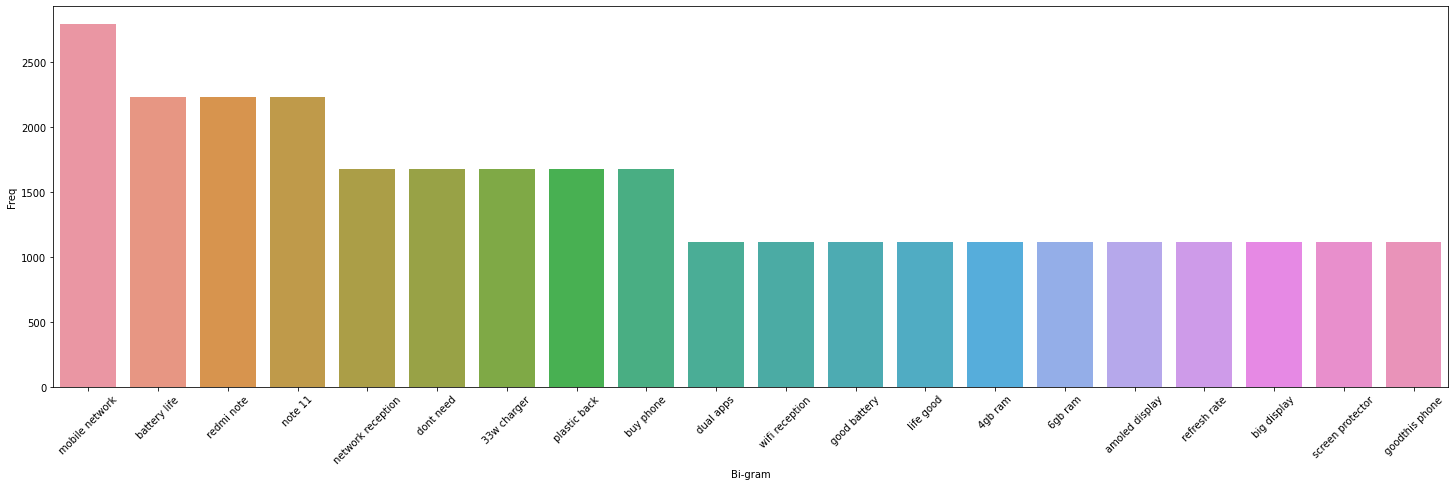

In [70]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [71]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [73]:
top3_words = get_top_n3_words(data["Cleaned_Reviews"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,redmi note 11,1674
1,good battery life,1116
2,plastic back phone,1116
3,update activate game,558
4,activate game turbo,558
...,...,...
195,hz screen think,558
196,screen think gimmick,558
197,think gimmick marketed,558
198,gimmick marketed companies,558


[Text(0, 0, 'redmi note 11'),
 Text(0, 0, 'good battery life'),
 Text(0, 0, 'plastic back phone'),
 Text(0, 0, 'update activate game'),
 Text(0, 0, 'activate game turbo'),
 Text(0, 0, 'game turbo improve'),
 Text(0, 0, 'turbo improve gaming'),
 Text(0, 0, 'improve gaming preformance'),
 Text(0, 0, 'gaming preformance settings'),
 Text(0, 0, 'preformance settings special'),
 Text(0, 0, 'settings special features'),
 Text(0, 0, 'special features gaming'),
 Text(0, 0, 'features gaming turbo'),
 Text(0, 0, 'gaming turbo ram'),
 Text(0, 0, 'turbo ram management'),
 Text(0, 0, 'ram management keep'),
 Text(0, 0, 'management keep apps'),
 Text(0, 0, 'keep apps ram'),
 Text(0, 0, 'apps ram recent'),
 Text(0, 0, 'ram recent apps')]

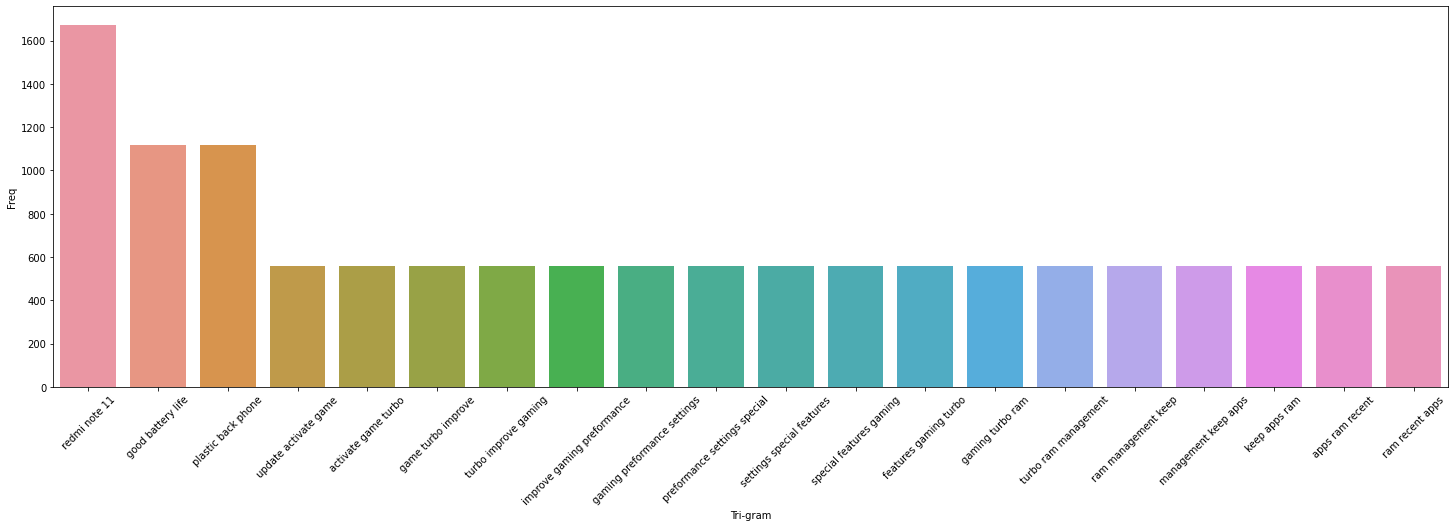

In [74]:
#Tri-gram plot
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [75]:
string_total = " ".join(data["Cleaned_Reviews"])
string_total[:2000]

'update 1 1 activate game turbo improve gaming preformance settings special features gaming turbo 2 ram management keep apps ram recent apps forever settings battery click gear symbol top right clear cache device locked never default value 10 min 3 dual apps settings apps dual apps createi looking phone 10k person believes burn money phones requirement phone good network reception good wifi reception balanced software good battery life good screen dont strain eyes good hardware 35 mm headphone jack charger dont need 5g network 5g drains battery lot 5g spends much data dont watch movie yt mobile network wonder many watch fhd 2k 4k videos mobile network downloading documents social networks banking apps 4g enoughin budget found phones 4gb ram realme narzo 50 9999 gif features along good processor another one redmi note 11 found extend budget little coupons bank offer get redmi note 11 6gb ram 11749 6gb ram always preferred 4gb ram nobody knows whether future updates os would demand ram a

(-0.5, 1799.5, 1499.5, -0.5)

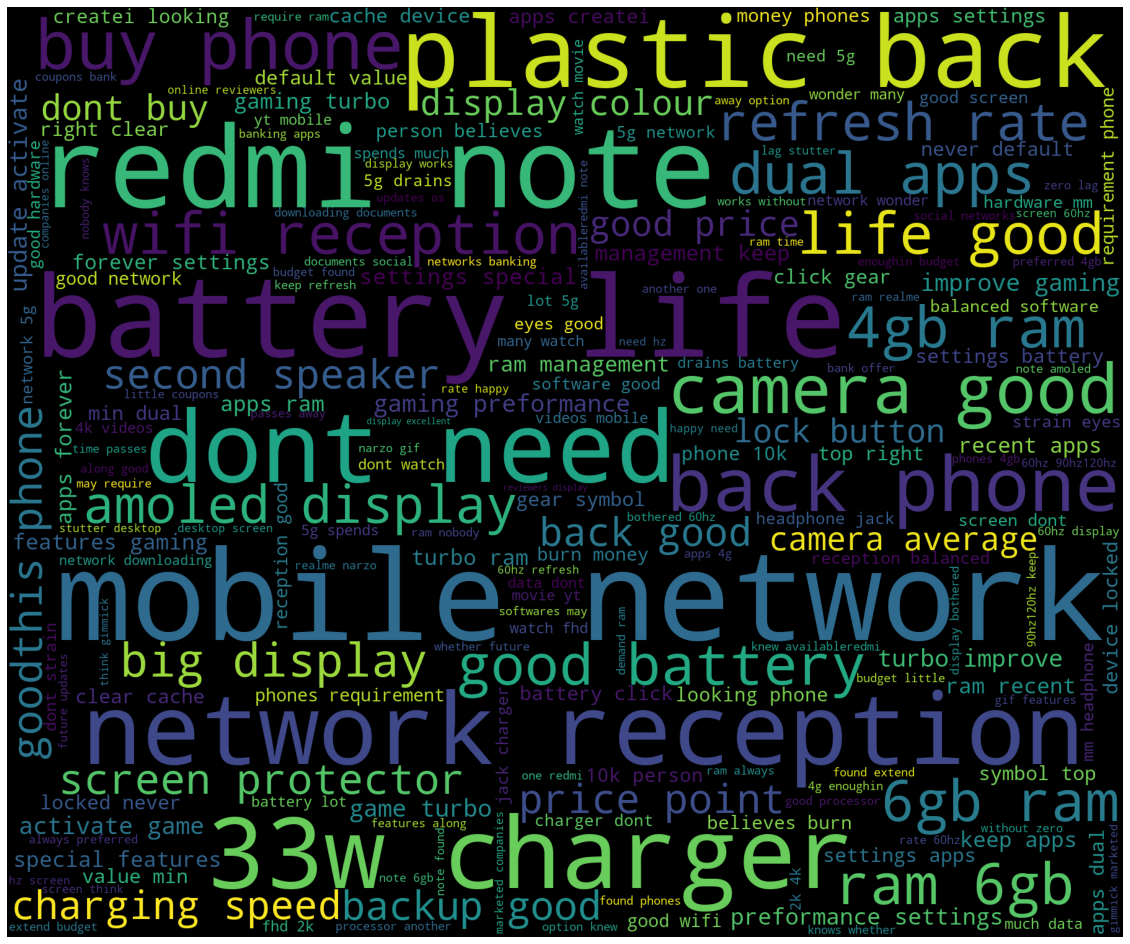

In [123]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_generator = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_total)
fig = plt.figure(figsize = (20,20))
plt.imshow(wordcloud_generator)
plt.axis('off')

In [77]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

In [79]:
fetch_sentiment_using_textblob = data.Cleaned_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(fetch_sentiment_using_textblob.value_counts())

,Cleaned_Reviews
positive,5022
negative,558


In [80]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [82]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(data.Cleaned_Reviews[3])

{'neg': 0.033, 'neu': 0.743, 'pos': 0.224, 'compound': 0.9432}

In [115]:
df_score=pd.DataFrame()
df_score['Cleaned_Reviews'] = data.Cleaned_Reviews
df_score['scores'] = data['Cleaned_Reviews'].apply(lambda review: sid.polarity_scores(review))
df_score['compound']  = df_score['scores'].apply(lambda scores: scores['compound'])
df_score['sentiment'] = df_score['compound'].apply(lambda c: 'Positive' if c >=0.75 else ('Negative' if c<=-0.75  else 'Neutral'))
df_score.head(10)

,Cleaned_Reviews,scores,compound,sentiment
0,update 1 1 activate game turbo improve gaming ...,"{'neg': 0.046, 'neu': 0.711, 'pos': 0.243, 'co...",0.9992,Positive
1,first look starbust design eye catchyno word e...,"{'neg': 0.045, 'neu': 0.717, 'pos': 0.238, 'co...",0.9824,Positive
2,good phone average users 464 gbbattery backup ...,"{'neg': 0.071, 'neu': 0.791, 'pos': 0.138, 'co...",0.6369,Neutral
3,50 days usage1 good battery life bqest dayday ...,"{'neg': 0.033, 'neu': 0.743, 'pos': 0.224, 'co...",0.9432,Positive
4,quite smooth daily driver phone overall experi...,"{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp...",0.9434,Positive
5,dont buy phone wrong choice working 5months ic...,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.6192,Neutral
6,description sayscamera quality upto mark compa...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.9260,Positive
7,looking budget phone fast charging capability ...,"{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'comp...",0.7269,Neutral
8,price value moneycamara ok impressivelooks als...,"{'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'comp...",0.8271,Positive
9,impressive mobile like,"{'neg': 0.0, 'neu': 0.147, 'pos': 0.853, 'comp...",0.7003,Neutral


In [102]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

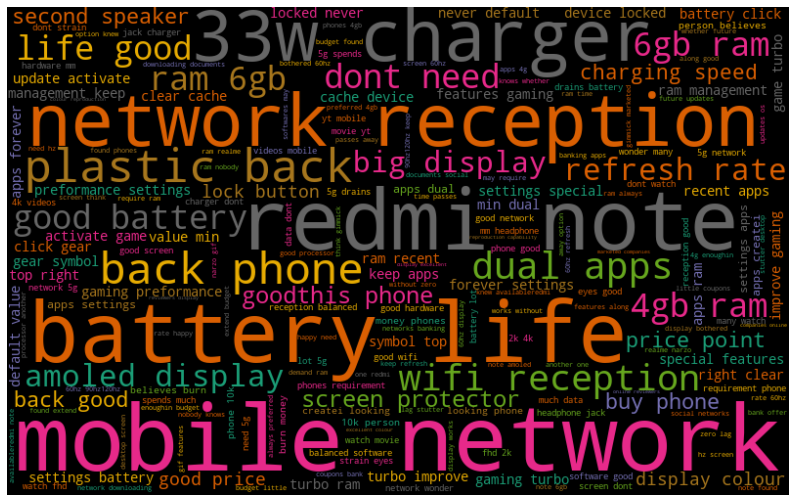

In [118]:
all_words = ' '.join([text for text in df_score['Cleaned_Reviews'][df_score.sentiment == 'Positive']])
generate_wordcloud(all_words)

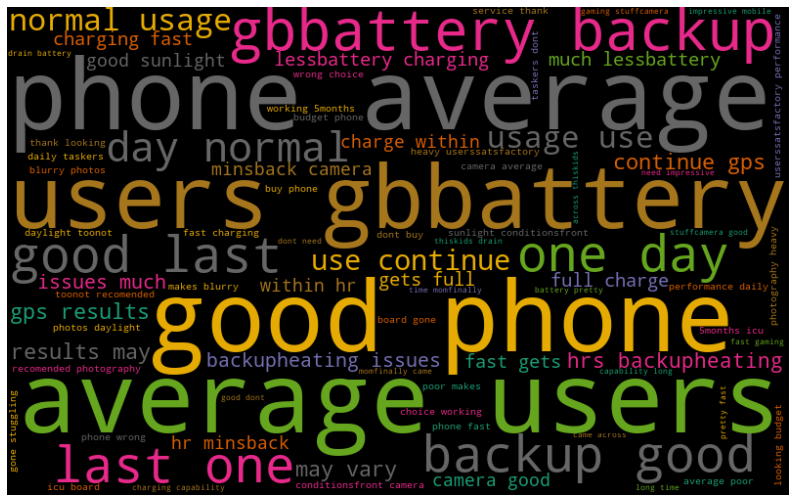

In [117]:
all_words = ' '.join([text for text in df_score['Cleaned_Reviews'][df_score.sentiment == 'Neutral']])
generate_wordcloud(all_words)

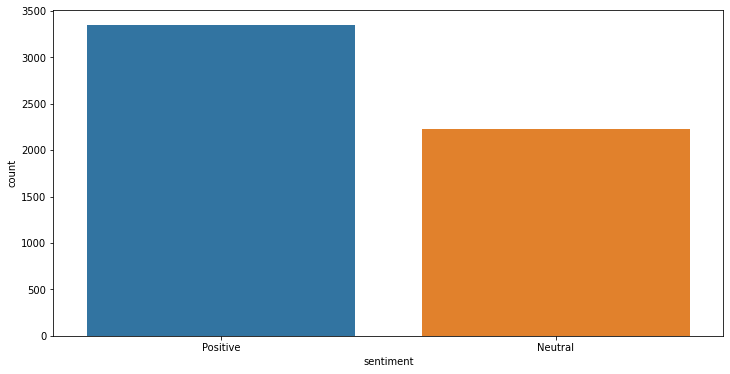

In [116]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_score)

In [112]:
# #Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.tokenize import RegexpTokenizer

# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn import metrics

In [113]:
# token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts = cv.fit_transform(df_score['Cleaned_Reviews'])

# X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df_score['sentiment'], test_size=0.25, random_state=7)

In [ ]:
# MNB = MultinomialNB()
# MNB.fit(X_train, Y_train)

# predicted = MNB.predict(X_test)
# accuracy_score = metrics.accuracy_score(predicted, Y_test)
# print("Accuracuy Score: ",accuracy_score*100)